### **Read data**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

data_root = './dataset'
data_path = os.path.join(data_root, 'churn_data_clean.csv')

df = pd.read_csv(data_path)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [2]:
df.shape

(10348, 27)

### **Split Data**
Split data into training, validation, testing set with ratio 7:1:2

In [3]:
X = df.loc[:, df.columns != 'Churn'] # Features
y = df.loc[:, df.columns == 'Churn'] # Target
print(X.shape)
print(y.shape)

(10348, 26)
(10348, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

print('Training set: ', y_train.shape)
print('Validation set: ', y_val.shape)
print('Testing set: ', y_test.shape)

Training set:  (7243, 1)
Validation set:  (1035, 1)
Testing set:  (2070, 1)


In [5]:
X_train.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1939,1,0,0,1,1,1,0,0,0,0,0,0,0,1,21.050000,21.050000,0,0,1,1,0,0,0,0,0,1
2497,0,0,1,0,4,1,0,0,0,0,0,0,0,0,19.600000,93.450000,0,0,1,1,0,0,0,0,0,1
5222,0,0,0,0,8,1,1,1,1,1,0,0,0,1,65.500000,573.150000,1,0,0,1,0,0,1,0,0,0
7482,1,0,0,0,3,1,0,0,0,0,0,0,0,1,70.067047,233.635071,0,1,0,1,0,0,0,0,1,0
229,0,0,1,1,47,1,1,1,1,0,1,1,1,1,85.300000,4107.250000,1,0,0,0,0,1,0,1,0,0
4876,1,0,0,0,10,1,0,1,1,1,0,1,1,1,104.400000,1081.450000,0,1,0,1,0,0,0,0,1,0
2914,1,0,0,0,32,1,0,0,0,0,0,1,1,1,64.850000,2010.950000,1,0,0,0,1,0,1,0,0,0
68,0,0,1,1,50,1,0,0,0,0,0,0,0,0,20.150000,930.900000,0,0,1,0,0,1,1,0,0,0
7832,1,0,1,0,66,1,1,0,1,1,1,1,1,1,106.060504,7139.740286,0,1,0,0,1,0,0,0,1,0
7494,0,1,0,0,52,1,1,0,1,0,0,1,0,1,83.370580,4349.291005,0,1,0,1,0,0,0,0,1,0


In [6]:
X_val.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5853,1,0,1,0,62,1,1,1,1,0,0,0,1,0,96.100000,6001.450000,0,1,0,0,1,0,0,0,1,0
4882,0,0,0,0,66,0,0,1,1,1,1,1,1,1,62.500000,4136.400000,1,0,0,0,0,1,1,0,0,0
2414,0,0,1,0,25,1,0,0,0,0,0,0,0,1,20.200000,507.900000,0,0,1,0,1,0,1,0,0,0
5642,0,0,0,0,20,1,0,0,0,0,0,0,0,0,19.500000,403.150000,0,0,1,0,1,0,0,0,0,1
8623,1,0,0,0,2,1,0,0,0,0,0,0,0,1,44.767381,94.317657,1,0,0,1,0,0,0,0,1,0
1128,1,0,0,0,27,1,0,0,0,0,0,0,0,1,19.400000,529.800000,0,0,1,1,0,0,0,0,1,0
6990,1,0,1,0,36,1,0,1,0,0,0,1,1,1,93.600000,3366.050000,0,1,0,1,0,0,0,0,1,0
4849,1,0,0,0,41,0,0,0,0,1,0,1,1,1,51.350000,2075.100000,1,0,0,0,1,0,0,0,1,0
5744,1,1,1,0,40,1,0,0,0,0,0,0,1,0,55.800000,2283.300000,1,0,0,0,1,0,0,0,1,0
9067,1,0,0,0,55,1,0,1,1,0,0,0,0,1,40.541898,2106.960062,1,0,0,1,0,0,0,0,1,0


In [7]:
X_test.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9428,1,0,0,0,47,1,1,0,0,1,0,1,1,1,93.853385,4506.133022,0,1,0,1,0,0,0,0,1,0
4593,0,0,0,0,11,1,0,0,0,0,0,0,0,0,20.300000,246.300000,0,0,1,1,0,0,1,0,0,0
5379,0,0,1,0,56,1,1,1,0,0,0,1,1,1,98.000000,5270.600000,0,1,0,0,1,0,0,0,1,0
8918,1,0,0,0,8,1,0,0,0,0,0,0,0,1,74.938341,631.572940,0,1,0,1,0,0,0,0,1,0
6448,1,0,0,0,58,1,1,0,0,1,1,1,1,1,104.650000,6219.600000,0,1,0,0,1,0,0,0,1,0
6060,0,1,0,0,8,1,0,0,1,0,0,1,0,1,87.100000,713.600000,0,1,0,1,0,0,0,0,1,0
850,0,0,1,1,72,1,1,1,1,1,1,1,1,1,115.800000,8476.500000,0,1,0,0,0,1,1,0,0,0
713,0,0,0,1,14,1,1,1,0,0,1,0,0,1,86.000000,1164.050000,0,1,0,1,0,0,0,0,0,1
8661,1,0,0,0,3,0,0,0,0,0,0,0,0,0,27.602254,74.301170,1,0,0,1,0,0,0,0,1,0
4438,1,0,1,1,51,1,1,0,0,0,0,0,0,1,24.950000,1222.250000,0,0,1,0,0,1,0,0,0,1


### **Normalization**

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

### **Gradient Boosting Decision Tree**

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

gbdt = GradientBoostingClassifier(random_state=42)

# Measure the training time of the model
t0 = time.time()

gbdt.fit(X_train, y_train.values.ravel())

print(f'Training time: {(time.time()-t0):.2f} s')

Training time: 3.45 s


Accuracy: 0.8271
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       524
           1       0.81      0.85      0.83       511

    accuracy                           0.83      1035
   macro avg       0.83      0.83      0.83      1035
weighted avg       0.83      0.83      0.83      1035



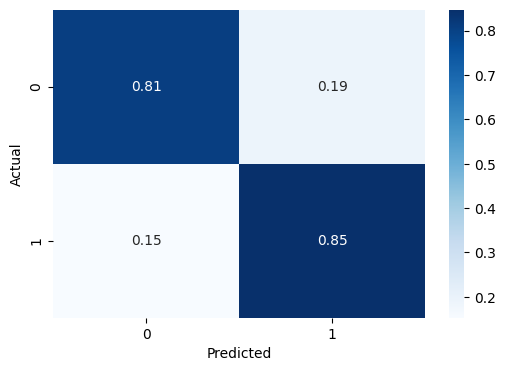

In [10]:
y_val_gbdt_pred = gbdt.predict(X_val)
accuracy = accuracy_score(y_val, y_val_gbdt_pred)

print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_gbdt_pred))
gbdt_confmat = confusion_matrix(y_val, y_val_gbdt_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(gbdt_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
gbdt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### *Parameters Tuning for Gradient Boosting Decision Tree*

**learning_rate** <br>
The graph shows high learning rate will result in overfitting. For our data, a learning rate of 0.1 is optimal. (default=1.0)

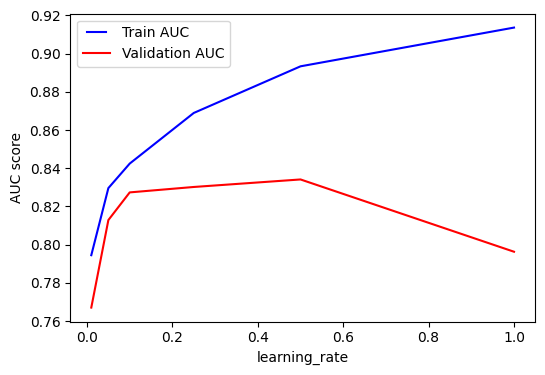

In [30]:
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
val_results = []

for lr in learning_rates:
    model = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train.values.ravel())   
    train_pred = model.predict(X_train)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning_rate')
plt.show()

**n_estimators** <br>
For our data, n_estimators of 150 is optimal. (default=100)

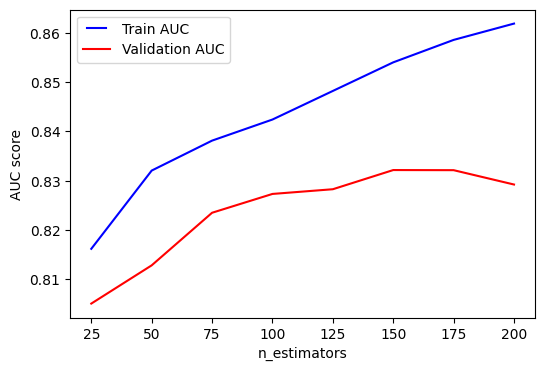

In [31]:
n_estimators = [25,50,75,100,125,150,175,200]
train_results = []
val_results = []

for n in n_estimators:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train.values.ravel())   
    train_pred = model.predict(X_train)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

**min_samples_split**<br>
Fix n_estimators=150 and tune min_samples_split. For our data, min_samples_split of 60 is optimal. (default=2)

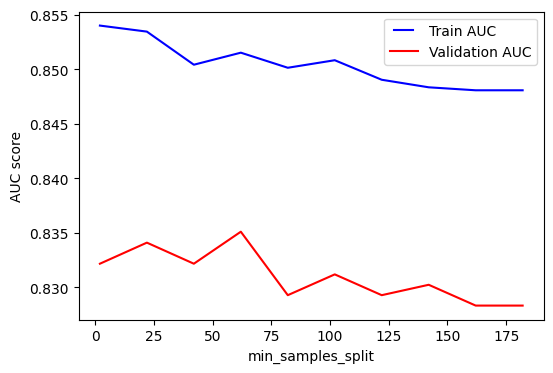

In [32]:
min_samples_split = list(range(2, 193, 20))
train_results = []
val_results = []

for sample in min_samples_split:
    model = GradientBoostingClassifier(min_samples_split=sample, n_estimators=150, random_state=42)
    model.fit(X_train, y_train.values.ravel()) 
    train_pred = model.predict(X_train)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(min_samples_split, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_split, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

**max_depth**<br>
Fix min_samples_split=60, n_estimators=150 and tune max_depth. For our data, max_depth of 3 is optimal. (default=3)

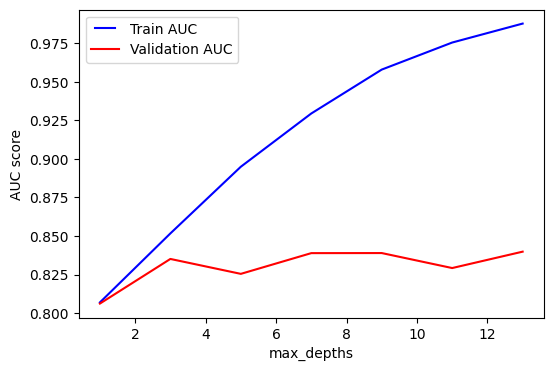

In [33]:
max_depths = list(range(1, 15, 2))
train_results = []
val_results = []

for depth in max_depths:
    model = GradientBoostingClassifier(max_depth=depth, min_samples_split=60, n_estimators=150, random_state=42)
    model.fit(X_train, y_train.values.ravel())   
    train_pred = model.predict(X_train)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

**min_samples_leaf** <br>
Fix min_samples_split=60, n_estimators=150 and tune min_samples_leaf. For our data, min_samples_leaf of 1 is optimal. (default=1)

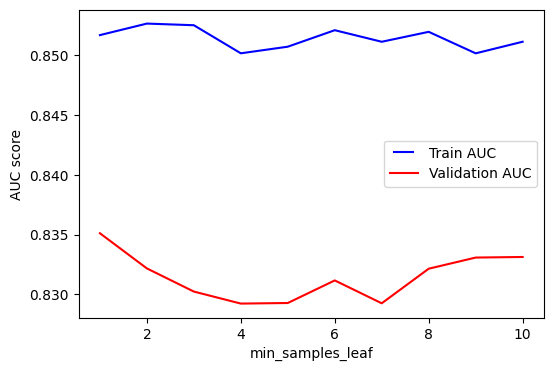

In [34]:
min_samples_leaf = list(range(1, 11))
train_results = []
val_results = []

for leaf in min_samples_leaf:
    model = GradientBoostingClassifier(min_samples_leaf=leaf, min_samples_split=60, n_estimators=150, random_state=42)
    model.fit(X_train, y_train.values.ravel())   
    train_pred = model.predict(X_train)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaf, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

**max_features**<br>
Fix min_samples_split=60, n_estimators=150 and tune max_features. For our data, max_features of 21 is optimal. (default=n_features)

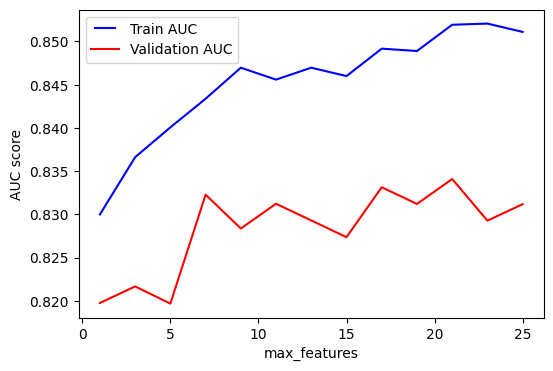

In [35]:
max_features = list(range(1,X_train.shape[1],2))
train_results = []
val_results = []

for feature in max_features:
    model = GradientBoostingClassifier(max_features=feature, min_samples_split=60, n_estimators=150, random_state=42)
    model.fit(X_train, y_train.values.ravel())   
    train_pred = model.predict(X_train)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,4))
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

#### **Tuned Gradient Boosting Decision Tree**

In [42]:
gbdt_tune = GradientBoostingClassifier(min_samples_split=60,
                                          max_features=21,
                                          n_estimators=150,
                                          random_state=42)

# Measure the training time of the model
t0 = time.time()

gbdt_tune.fit(X_train, y_train.values.ravel())

print(f'Training time: {(time.time()-t0):.2f} s')

Training time: 5.86 s


Accuracy: 0.8338
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       524
           1       0.82      0.86      0.84       511

    accuracy                           0.83      1035
   macro avg       0.83      0.83      0.83      1035
weighted avg       0.83      0.83      0.83      1035



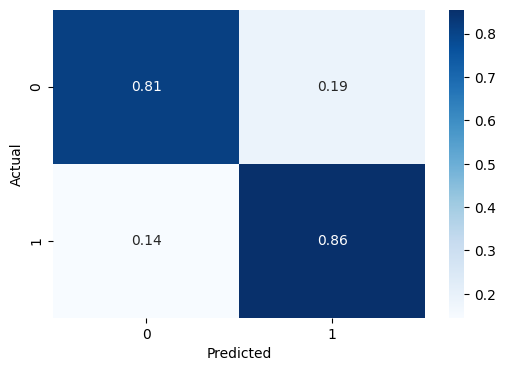

In [43]:
y_val_gbdt_tune_pred = gbdt_tune.predict(X_val)
accuracy = accuracy_score(y_val, y_val_gbdt_tune_pred)

print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_gbdt_tune_pred))
gbdt_tune_confmat = confusion_matrix(y_val, y_val_gbdt_tune_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(gbdt_tune_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **PCA**
Choose the number of components for which the cumulative explained variance exceeds a threshold of 0.95 (95%).

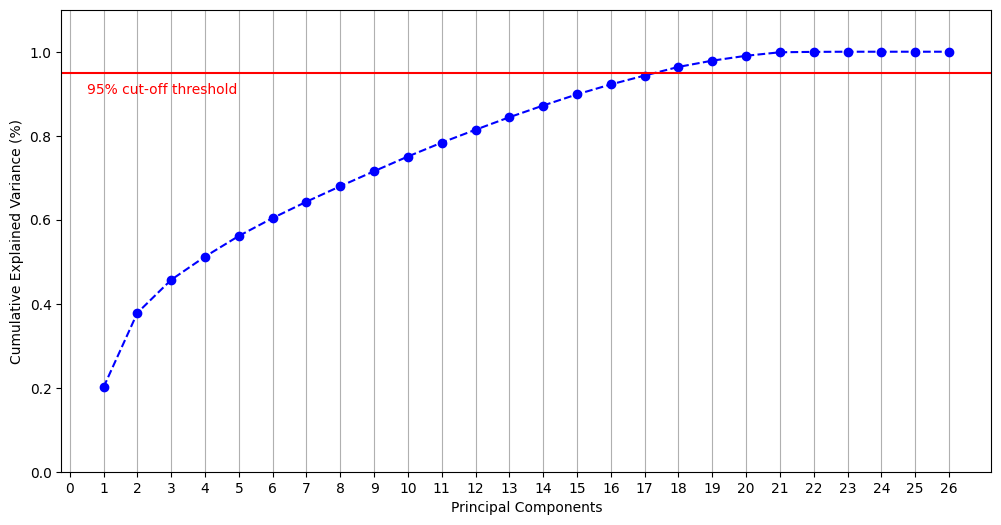

In [44]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_normalized)

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 27, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Principal Components')
plt.xticks(np.arange(0, 27, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative Explained Variance (%)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color = 'red')

ax.grid(axis='x')
plt.show()

In [45]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train_normalized)
X_train_pca = pca.transform(X_train_normalized)
X_val_pca = pca.transform(X_val_normalized)
X_test_pca = pca.transform(X_test_normalized)

### **Gradient Boosting Decision Tree with PCA**

In [46]:
gbdt_pca = GradientBoostingClassifier(random_state=42)

# Measure the training time of the model
t0 = time.time()

gbdt_pca.fit(X_train_pca, y_train.values.ravel())

print(f'Training time: {time.time()-t0:.2f} s')

Training time: 21.96 s


Accuracy: 0.8193
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       524
           1       0.79      0.86      0.82       511

    accuracy                           0.82      1035
   macro avg       0.82      0.82      0.82      1035
weighted avg       0.82      0.82      0.82      1035



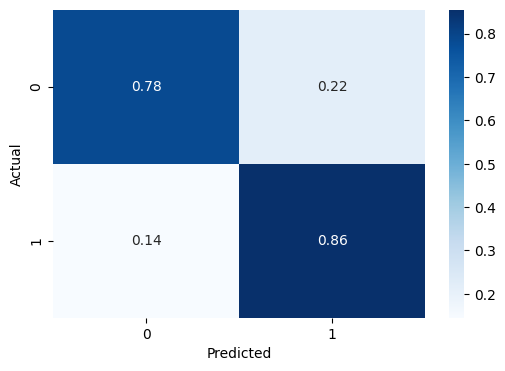

In [47]:
y_val_gbdt_pca_pred = gbdt_pca.predict(X_val_pca)
accuracy_pca = accuracy_score(y_val, y_val_gbdt_pca_pred)

print(f'Accuracy: {accuracy_pca:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_gbdt_pca_pred))
gbdt_pca_confmat = confusion_matrix(y_val, y_val_gbdt_pca_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(gbdt_pca_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### *Parameters Tuning for Gradient Boosting Decision Tree with PCA*

**learning_rate**<br>
The graph shows high learning rate will result in overfitting. For our data, a learning rate of 0.1 is optimal. (default=1.0)

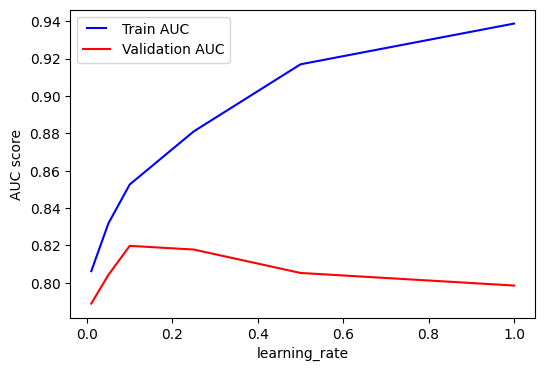

In [48]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
val_results = []

for lr in learning_rates:
    model = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train_pca, y_train.values.ravel())   
    train_pred = model.predict(X_train_pca)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val_pca)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning_rate')
plt.show()

**n_estimators**<br>
For our data, n_estimators of 100 is optimal. (default=100)

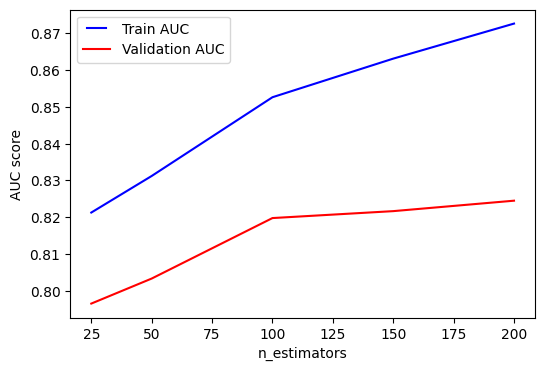

In [49]:
n_estimators = [25,50,100,150,200]
train_results = []
val_results = []

for n in n_estimators:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_pca, y_train.values.ravel())   
    train_pred = model.predict(X_train_pca)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val_pca)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

**min_samples_split**<br>
For our data, min_samples_split of 20 is optimal. (default=2)

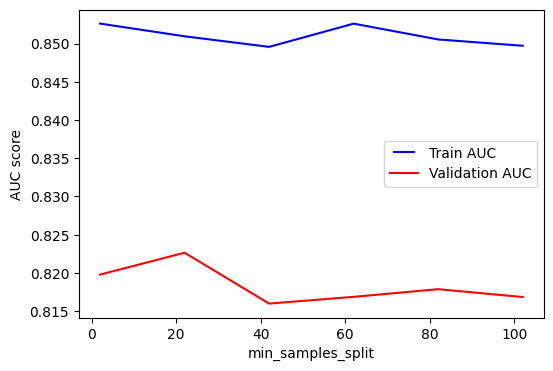

In [50]:
min_samples_split = list(range(2, 121, 20))
train_results = []
val_results = []

for sample in min_samples_split:
    model = GradientBoostingClassifier(min_samples_split=sample,n_estimators=100, random_state=42)
    model.fit(X_train_pca, y_train.values.ravel()) 
    train_pred = model.predict(X_train_pca)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val_pca)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(min_samples_split, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_split, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

**max_depths**<br>
Fix min_samples_split=20 and tune max_depth. For our data, max_depth of 3 is optimal. (default=3)

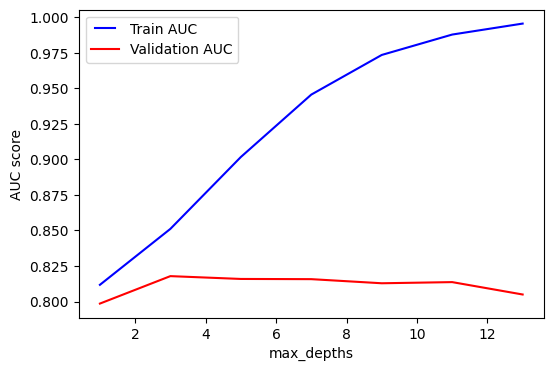

In [51]:
max_depths = list(range(1, 15, 2))
train_results = []
val_results = []

for depth in max_depths:
    model = GradientBoostingClassifier(max_depth=depth, min_samples_split=20, random_state=42)
    model.fit(X_train_pca, y_train.values.ravel())   
    train_pred = model.predict(X_train_pca)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val_pca)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

**min_samples_leaf**<br>
Fix min_samples_split=20 and tune min_samples_leaf. For our data, min_samples_leaf of 2 is optimal. (default=1)

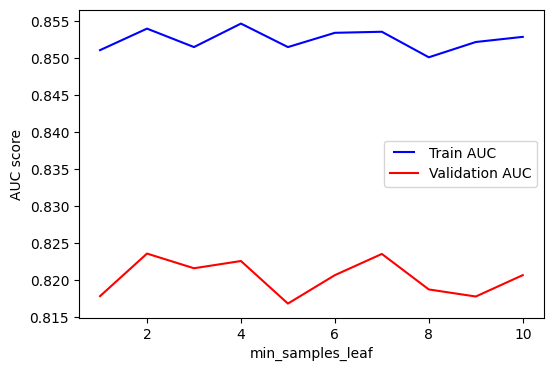

In [52]:
min_samples_leaf = list(range(1, 11))
train_results = []
val_results = []

for leaf in min_samples_leaf:
    model = GradientBoostingClassifier(min_samples_leaf=leaf, min_samples_split=20, random_state=42)
    model.fit(X_train_pca, y_train.values.ravel())   
    train_pred = model.predict(X_train_pca)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val_pca)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaf, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

**max_features**<br>
Fix min_samples_split=20, min_samples_leaf=2 and tune max_features. We can use default value. (default=n_features)

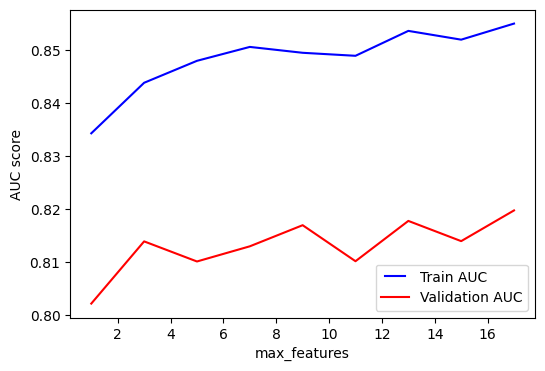

In [53]:
max_features = list(range(1,X_train_pca.shape[1],2))
train_results = []
val_results = []

for feature in max_features:
    model = GradientBoostingClassifier(max_features=feature, min_samples_split=20, min_samples_leaf=2, random_state=42)
    model.fit(X_train_pca, y_train.values.ravel())   
    train_pred = model.predict(X_train_pca)  
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(X_val_pca)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

plt.figure(figsize=(6,4))
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, val_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

#### **Tuned Gradient Boosting Decision Tree with PCA**

In [54]:
gbdt_pca_tune = GradientBoostingClassifier(min_samples_leaf=2,
                                           min_samples_split=20,
                                           random_state=42)

# Measure the training time of the model
t0 = time.time()

gbdt_pca_tune.fit(X_train_pca, y_train.values.ravel())

print(f'Training time: {time.time()-t0:.2f} s')

Training time: 19.27 s


Accuracy: 0.8232
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       524
           1       0.80      0.86      0.83       511

    accuracy                           0.82      1035
   macro avg       0.82      0.82      0.82      1035
weighted avg       0.83      0.82      0.82      1035



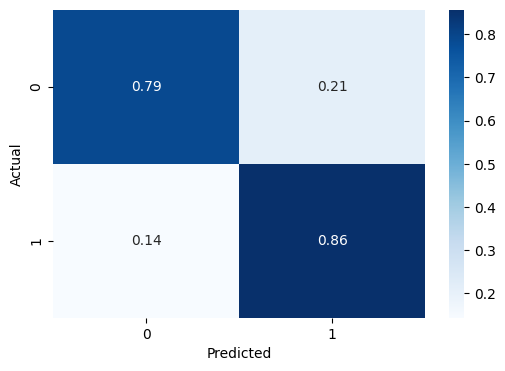

In [55]:
y_val_gbdt_tune_pca_pred = gbdt_pca_tune.predict(X_val_pca)
accuracy_tune_pca = accuracy_score(y_val, y_val_gbdt_tune_pca_pred)

print(f'Accuracy: {accuracy_tune_pca:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_gbdt_tune_pca_pred))
gbdt_tune_pca_confmat = confusion_matrix(y_val, y_val_gbdt_tune_pca_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(gbdt_tune_pca_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Export Model**

In [56]:
import joblib

# Save model
joblib.dump(gbdt, './models/gbdt.sav')
joblib.dump(gbdt_tune, './models/gbdt_tune.sav')
joblib.dump(gbdt_pca, './models/gbdt_pca.sav')
joblib.dump(gbdt_pca_tune, './models/gbdt_pca_tune.sav')

['./models/gbdt_pca_tune.sav']